In [1]:
using Pkg,Plots
Pkg.activate("..")
using OpenSAFT

 Activating environment at `~/Documents/University/UROP/SAFT codes/OpenSAFT/Project.toml`


## Figure 2

In [2]:
# Initiate system
ethane = system(["ethane"],"sPCSAFT")
mix_1 = system(["methane","ethane"],"sPCSAFT");
mix_2 = system(["methane","ethane"],"PCSAFT");

In [3]:
# Obtain saturation pressure of less volatile component
(P_sat,v_l,v_v) = get_sat_pure(ethane, 199.9);

In [4]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-3,0.955,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_1,v_l,v_v,y) = get_bubble_pressure(mix_1, 199.9, x);

# Concantenate results
x_1 = x[:,1]
y_1 = y[:,1]
pushfirst!(x_1,0.)
pushfirst!(y_1,0.)
pushfirst!(P_sat_mix_1,P_sat[1])
z_1 = vcat(x_1,reverse(y_1))
P_sat_mix_1 = vcat(P_sat_mix_1,reverse(P_sat_mix_1));

In [5]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-3,0.955,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_2,v_l,v_v,y) = get_bubble_pressure(mix_2, 199.9, x);

# Concantenate results
x_2 = x[:,1]
y_2 = y[:,1]
pushfirst!(x_2,0.)
pushfirst!(y_2,0.)
pushfirst!(P_sat_mix_2,P_sat[1])
z_2 = vcat(x_2,reverse(y_2))
P_sat_mix_2 = vcat(P_sat_mix_2,reverse(P_sat_mix_2));

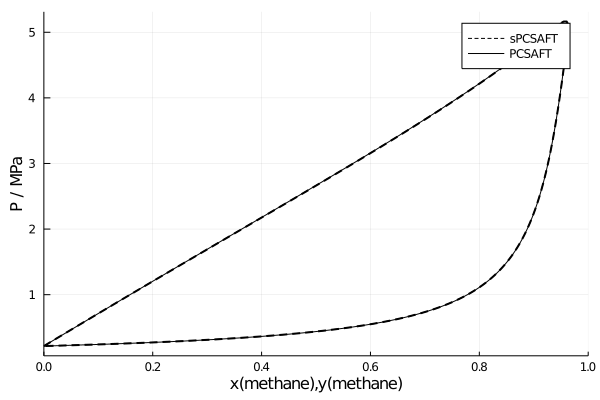

In [6]:
plt = plot(z_1,P_sat_mix_1/1e6,color=:black,linestyle=:dash,linewidth=2,label="sPCSAFT",xlabel="x(methane),y(methane)",ylabel="P / MPa",xlim=(0,1))
plt = plot!(z_2,P_sat_mix_2/1e6,color=:black,label="PCSAFT",xlabel="x(methane),y(methane)",ylabel="P / MPa",xlim=(0,1))

display(plt)

## Figure 9

In [7]:
# Initiate system
methanol = system(["methanol"],"sPCSAFT")
pentane = system(["pentane"],"sPCSAFT")
mix = system(["pentane","methanol"],"sPCSAFT");

In [8]:
# Obtain saturation pressure of less volatile component
(P_sat_1,v_l,v_v) = get_sat_pure(pentane, 397.7)
(P_sat_2,v_l,v_v) = get_sat_pure(methanol, 397.7);

In [9]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-4,1-1e-2,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_1,v_l,v_v,y) = get_bubble_pressure(mix, 397.7, x);

# Concantenate results
x_1 = x[:,1]
y_1 = y[:,1]
append!(x_1,1.)
append!(y_1,1.)
append!(P_sat_mix_1,P_sat_1[end])
pushfirst!(x_1,0.)
pushfirst!(y_1,0.)
pushfirst!(P_sat_mix_1,P_sat_2[1])
z_1 = vcat(x_1,reverse(y_1))
P_sat_mix_1 = vcat(P_sat_mix_1,reverse(P_sat_mix_1));

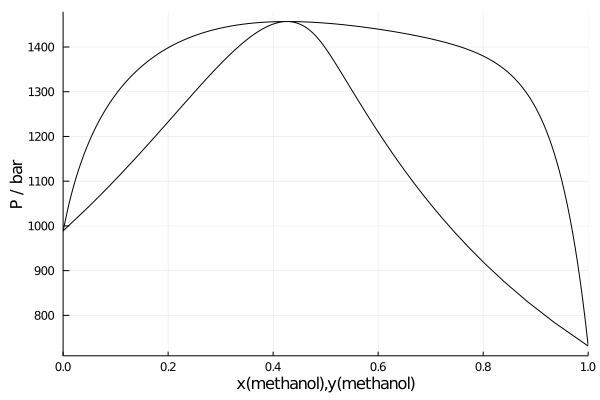

In [10]:
# Plotting
plt = plot(1 .-z_1,P_sat_mix_1/1e3,color=:black,label="",xlabel="x(methanol),y(methanol)",ylabel="P / bar",xlim=(0,1))
display(plt)

## Figure 7

In [11]:
mix = system(["methane","ethane","propane","isobutane","butane","isopentane","pentane","hexane",
              "methylcyclopentane","benzene","cyclohexane","heptane","methylcyclohexane","toluene",
              "octane","m-xylene","o-xylene","nonane","decane","undecane","dodecane","tridecane",
              "tetradecane","pentadecane","hexadecane","heptadecane","octadecane","nonadecane",
              "eicosane","C21","C22","C23","C24","C25","C26","C27"],"sPCSAFT");

In [12]:
x = [0.738427,0.072998,0.046031,0.009098,0.018082,0.008626,0.009655,0.014289,
     0.003652,0.000449,0.006811,0.015889,0.011746,0.003926,0.014322,0.003559,
     0.000881,0.007549,0.006041,0.003384,0.001726,0.001217,0.000690,0.000310,
     0.000236,0.000164,0.000104,0.000059,0.000034,0.000014,0.000009,0.000007,
     0.000006,0.000005,0.000004,0.000003]
z = zeros((1,36))
for i in 1:length(x)
    z[i]=x[i];
end
z

1×36 Array{Float64,2}:
 0.738427  0.072998  0.046031  0.009098  …  6.0e-6  5.0e-6  4.0e-6  3.0e-6